# Interpolation search
### Introduction
The background to the interpolation search is described in **MOD007357 Coursework Brief 2021-22 (Task a)**, as search algorithm for sorted arrays to find the position of a search value. The task is to compare search performance for three strategies:

1. Pure interpolation search
2. Mixed interpolation search and binary search
3. Pure binary search

### Implementation summary
The seearch algorithms have been implemented in the *python* programming language, and can be applied to an input array by initialising an `ArraySearcher` class with the array, and calling the class' `search()` method - providing a search strategy input.

### ZIP archive
The code output of running the `main()` method can be found in the associated ZIP archive (`interpolation-search.zip`). Contents:

```
interpolation-search.zip
  - Interpolation search.html
  - Interpolation search.ipynb
  - interpolation_search.py
  - README.md
  - environment.yml
  results/
    - arithmetic_comparison.png
    - arithmetic_results.csv
    - geometric_comparison.png
    - geometric_results.csv
    - progression_space_comparison.png
```

### Dependencies
The `conda` environment required to run the `interpolation_search.py` code, and this notebook, can be recreated from the *environment.yml* file in the ZIP archive, and activated as follows:

```bash
conda env create -f environment.yml
conda activate interpolation-search
```

We can use a jupyter 'magic' command to generate the *environment.yml* file.

In [1]:
!conda env export --from-history > environment.yml

### Notebook
This notebook was created within the same python `conda` environment used to run the `interpolation_search.py`.

To generate the PDF version, the notebook was exported to HTML format and then printed to PDF format from Google Chrome.

### Imports

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from interpolation_search import ArraySearcher
from interpolation_search import generate_random_array
from interpolation_search import run_cardinality_tests, plot_cardinality_tests

pd.set_option('display.max_rows', 10)  # Keep table displays short
sns.set_context('talk')  # Make seaborn plots have good font sizes, line widths, etc 

### Walkthrough example

An example of each of our 3 searching algorithms can be seen below for a single input array.

#### Input parameters

In [3]:
CARDINALITY = 50
SPACE = 'arithmetic'
START_RANGE = (1, 10000)
STEP_RANGE = (1, 10000)

#### Generate the array
The `generate_random_array()` function can be used to generate random arrays by sampling from larger random (arithmetic or geometric) progressions. But by default (*sample_space_scale* argument as None) it will provide the progressions directly.  This is how we will use it here to demonstrate the performance of the searching algorithms.

In [4]:
array = generate_random_array(cardinality=CARDINALITY, space=SPACE, start_range=START_RANGE, step_range=STEP_RANGE)
print(array)

[1174, 3265, 5356, 7447, 9538, 11629, 13720, 15811, 17902, 19993, 22084, 24175, 26266, 28357, 30448, 32539, 34630, 36721, 38812, 40903, 42994, 45085, 47176, 49267, 51358, 53449, 55540, 57631, 59722, 61813, 63904, 65995, 68086, 70177, 72268, 74359, 76450, 78541, 80632, 82723, 84814, 86905, 88996, 91087, 93178, 95269, 97360, 99451, 101542, 103633]


#### Make an ArraySearcher
The `ArraySearcher` class will ensure any array passed to it is sorted before applying a search algorithm (not necessary for our example).  Once initialised, it can also choose its own *query_val*.

In [5]:
searcher = ArraySearcher(array)
query_val = searcher.get_random_array_item()
print(query_val)

26266


#### Apply each search algorithm in turn

In [6]:
results = searcher.compare_methods(query_val, verbose=True)

Iteration:   0 | Starting info        | Query value: 26266 | Bottom index:  0 | Top index: 49 | Bottom value:   1174 | Top value: 103633
The query value (26266) was found at index 12 (of the sorted array) after 1 iteration(s)
With interpolation method it took 1 search step(s) to find the query value.
Iteration:   0 | Starting info        | Query value: 26266 | Bottom index:  0 | Top index: 49 | Bottom value:   1174 | Top value: 103633
The query value (26266) was found at index 12 (of the sorted array) after 1 iteration(s)
With mixed method it took 1 search step(s) to find the query value.
Iteration:   0 | Starting info        | Query value: 26266 | Bottom index:  0 | Top index: 49 | Bottom value:   1174 | Top value: 103633
The query value (26266) was found at index 12 (of the sorted array) after 5 iteration(s)
With binary method it took 5 search step(s) to find the query value.


Running the `compare_methods()` function returns a dictionary that summarises number of iterations used by each method to find the *query_val*.

In [7]:
results

{'interpolation': 1, 'mixed': 1, 'binary': 5}

### Testing increasing cardinalities
It is interesting to see how the different methods compare as we increase the length (cardinality) of the input array.  To do this, we can make use of the `run_cardinality_tests()` method from `interpolation_search.py`.

In [8]:
def run_cardinality_tests(space='arithmetic', repeats=1000, top_power=10):
    """Runs repeated tests on a series of doubling cardinality values.
    
    A new progression is generated for each repeat, and all 3 splitting methods are compared.

    Args:
        space (str, optional): Whether to test 'arithmetic' or 'geometric' progressions.
                               Defaults to 'arithmetic'.
        repeats (int, optional): Number of repeats. Defaults to 1000.
        top_power (int, optional): Final value to use for the doubling progression (2**top_power).

    Returns:
        list[dicts]: A list of dictionaries of length 'repeats'.
                     Keys are the method names, plus 'cardinality'.
                     Values are the method absolute subset differences, plus cardinality
    """
    testing_results = []
    for cardinality in [2**n for n in range(top_power + 1)]:
        for _ in tqdm(range(repeats)):
            array = generate_random_array(cardinality=cardinality, space=space)
            searcher = ArraySearcher(array)
            query_val = searcher.get_random_array_item()
            results = searcher.compare_methods(query_val)
            results['cardinality'] = cardinality
            testing_results.append(results)

    return testing_results

This convenience function will progress through doubling cardinality values from 2<sup>0</sup> (1) to 2<sup>top_power</sup>.  For each value, *repeats* repeats are made of the following steps
* Generate a random progression
* Choose a random item to search for
* Compare the 3 search methods

#### Input parameters

In [9]:
SPACE = 'arithmetic'
REPEATS = 1000
TOP_POWER = 10 # 2**10 = 1024

#### Run the tests
The `run_cardinality_tests()` method uses `tqdm` to add a progress bar to each set of repeats.  Not very useful here, but more useful if testing is taking a long time.

In [10]:
arithmetic_results = run_cardinality_tests(space=SPACE, repeats=REPEATS, top_power=TOP_POWER)

100%|██████████| 1000/1000 [00:00<00:00, 7493.33it/s]


In [11]:
arithmetic_df = pd.DataFrame(arithmetic_results)
arithmetic_df

,interpolation,mixed,binary,cardinality
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
10995,1,1,9,1024
10996,1,1,9,1024
10997,1,1,2,1024
10998,1,1,6,1024


#### Plotting
The above shape of the data is convenient for readability, but not so good for certain plotting approaches.  The `seaborn` package makes plotting data (including data from a `pandas.DataFrame`) easy, but it is best to provide the data in a "tall, skinny" format.

#### Convert raw results into tall-skinny DataFrame
The raw data can be unpivotted using `pandas.melt()`.  This gives us the tall, skinny version of the output data where each method appears not as a column, but as a value in a single 'method' column.

In [12]:
tall_df = pd.melt(arithmetic_df, id_vars=['cardinality'],
                  var_name='method', value_name='iterations')
tall_df

,cardinality,method,iterations
0,1,interpolation,0
1,1,interpolation,0
2,1,interpolation,0
3,1,interpolation,0
4,1,interpolation,0
...,...,...,...
32995,1024,binary,9
32996,1024,binary,9
32997,1024,binary,2
32998,1024,binary,6


In [13]:
tall_df.groupby(['method', 'cardinality']).agg('size')[0]

1000

#### Plot
Seaborn's `lineplot()` method is an appropriate choice.  This method will plot the mean of the data, and can automatically show variation from the mean in a number of ways.  As we are probably most interested in how confident we are in the predicted mean values, 95% confidence intervals have been chosen (rather than standard deviations).

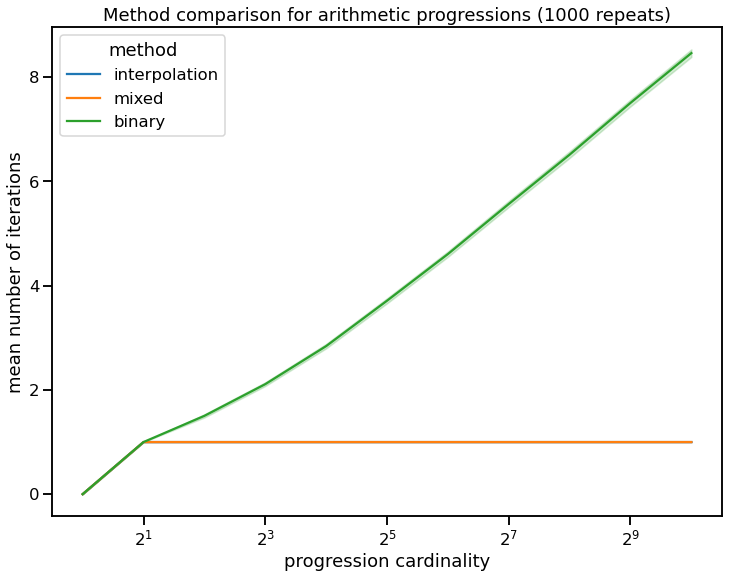

In [14]:
fig, ax = plt.subplots(figsize=(12, 9), facecolor='white')
ax = sns.lineplot(data=tall_df, x='cardinality', y='iterations', hue='method', ci=95)
ax.set_xlabel('progression cardinality')
ax.set_xscale('log', base=2)
ax.set_ylabel('mean number of iterations')
# Get repeats
repeats = len(arithmetic_df)
# Underscore assignment to supress Text object output
_ = ax.set_title(f'Method comparison for arithmetic progressions ({REPEATS} repeats)')

Both of the above steps can be conveniently run by calling the `plot_cardinality_tests()` method from `partition_problem.py`.  The inputs to this function are simply the raw result dictionary list, and the list of cardinality values used to generate the results:

```python
fig = plot_cardinality_tests(results=arithmetic_results)
```

#### Discussion
It is clear that the pure binary search method takes an increasing number of iterations to find the *query_val*; whereas both the pure interpolation search and the mixed method (overlapped) take a constant amount of time regardless of the cardinality (on average 1 iteration).  Obviously, the trivial case of cardinality = 1 takes zero iterations for all 3 methods!

### Testing geometric progressions
So far, we have only looked at the performance of the search methods when searching in arithmetic progressions.  What about if we are looking instead in geometric progressions (ie where each subsequent value in the progression is a fixed multiple of the value before).

The above convenience functions can be used with `space='geometric'` instead of `space='arithmetic'`.

#### Input parameters

In [15]:
SPACE = 'geometric'
REPEATS = 1000
TOP_POWER = 10 # 2**10 = 1024

#### Run the tests

In [16]:
geometric_results = run_cardinality_tests(space=SPACE, repeats=REPEATS, top_power=TOP_POWER)

100%|██████████| 1000/1000 [00:14<00:00, 68.76it/s]


Simply by looking at the time taken per iteration above, we can see geometric progressions give some extra problems.

#### Plotting

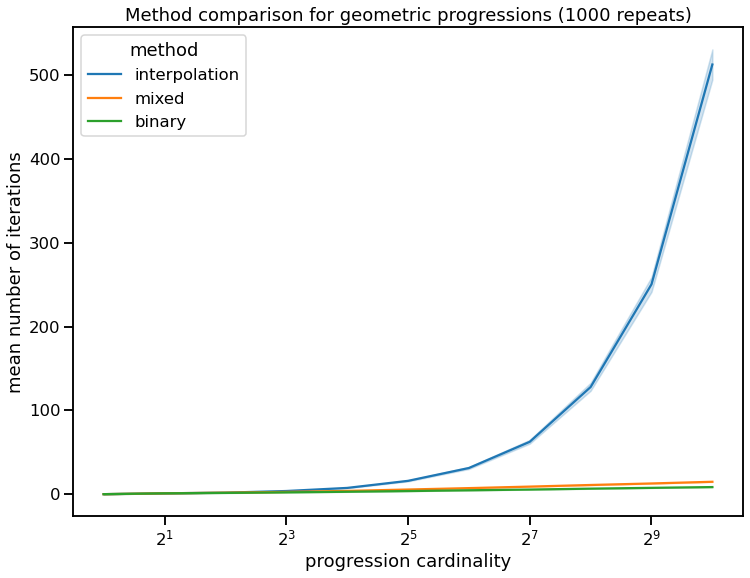

In [17]:
fig = plot_cardinality_tests(geometric_results, title='Method comparison for geometric progressions')

#### Discussion
It is immediately obvious that the interpolation search strategy is doing a really bad job for geometric progressions!

### Bar plot comparison
To get a better side-by-side comparison for the performance of the three methods on arithmetic vs geometric progressions, we can select one cardinality value and plot a bar chart.

#### Input parameters

In [18]:
CARDINALITY = 1024

#### Data processing

In [19]:
# (Re)make the arithmetic dataframe
arithmetic_df = pd.DataFrame(arithmetic_results)
# Add a new 'space' column
arithmetic_df['space'] = ['arithmetic' for _ in range(len(arithmetic_df))]
# Make the geometric dataframe
geometric_df = pd.DataFrame(geometric_results)
# Add a 'space' column
geometric_df['space'] = ['geometric' for _ in range(len(geometric_df))]
# Concatenate the two dataframes
space_testing_df = pd.concat([arithmetic_df, geometric_df])
# Select only rows with the chosen cardinality value
space_testing_df = space_testing_df[space_testing_df.cardinality == CARDINALITY]
# Make the tall df
tall_df = pd.melt(space_testing_df, id_vars=['space', 'cardinality'], var_name='method', value_name='iterations')
tall_df

,space,cardinality,method,iterations
0,arithmetic,1024,interpolation,1
1,arithmetic,1024,interpolation,1
2,arithmetic,1024,interpolation,1
3,arithmetic,1024,interpolation,1
4,arithmetic,1024,interpolation,1
...,...,...,...,...
5995,geometric,1024,binary,9
5996,geometric,1024,binary,9
5997,geometric,1024,binary,9
5998,geometric,1024,binary,9


#### Plotting
We will plot the y-axis on a log scale so that the the really poor interpolation performance doesn't dominate the plot.

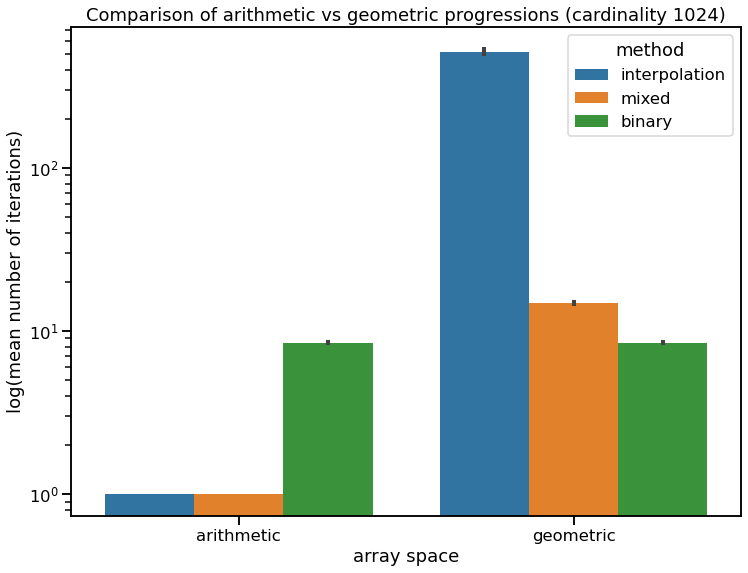

In [20]:
# Make the plot
fig, ax = plt.subplots(figsize=(12, 9), facecolor='white')
ax = sns.barplot(data=tall_df, x='space', y='iterations', hue='method')
ax.set_xlabel('array space')
ax.set_yscale('log', base=10)
ax.set_ylabel('log(mean number of iterations)')
# Add the title
_ = ax.set_title(f'Comparison of arithmetic vs geometric progressions (cardinality {CARDINALITY})')

Again, the above steps can be conveniently reproduced by using `plot_progression_comparison()` from `interpolation_search.py`.

```python
fig = plot_progression_comparison(arithmetic_results, geometric_results, cardinality=1024,
                                  title='Comparison of arithmetic vs geometric progressions')